In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('y_posts.csv')

In [4]:
df.head()

,UserID,PostID,Age,Country,Followers,PostType,PostHour,PostWeekday,Likes,Shares,Comments,EngagementScore
0,997,0,21,Canada,67,Text,22,Monday,21,4,2,0.447761
1,48,1,47,Canada,407,Video,18,Monday,20,5,4,0.105651
2,301,2,18,USA,174,Text,17,Monday,18,8,4,0.252874
3,880,3,22,UK,53,Video,6,Monday,116,7,10,3.056604
4,189,4,31,France,3,Text,8,Monday,24,5,1,11.666667


In [5]:
df.describe()

,UserID,PostID,Age,Followers,PostHour,Likes,Shares,Comments,EngagementScore
count,5000.0000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,503.7098,2499.500000,34.01800,205.586600,11.762000,28.977600,4.965400,15.295200,1.547303
std,288.4307,1443.520003,9.59565,203.580275,6.937505,27.176946,2.245353,21.652303,4.254233
min,0.0000,0.000000,18.00000,2.000000,0.000000,7.000000,0.000000,0.000000,0.017450
25%,252.0000,1249.750000,25.00000,61.000000,6.000000,17.000000,3.000000,2.000000,0.181470
50%,502.0000,2499.500000,34.00000,149.000000,12.000000,20.500000,5.000000,4.000000,0.440183
75%,756.0000,3749.250000,43.00000,277.250000,18.000000,24.000000,6.000000,8.000000,1.233675
max,999.0000,4999.000000,49.00000,1490.000000,23.000000,177.000000,17.000000,61.000000,121.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           5000 non-null   int64  
 1   PostID           5000 non-null   int64  
 2   Age              5000 non-null   int64  
 3   Country          5000 non-null   object 
 4   Followers        5000 non-null   int64  
 5   PostType         5000 non-null   object 
 6   PostHour         5000 non-null   int64  
 7   PostWeekday      5000 non-null   object 
 8   Likes            5000 non-null   int64  
 9   Shares           5000 non-null   int64  
 10  Comments         5000 non-null   int64  
 11  EngagementScore  5000 non-null   float64
dtypes: float64(1), int64(8), object(3)
memory usage: 468.9+ KB


In [7]:
df["Country"].value_counts()

Country
USA       1096
Spain     1052
France    1036
Canada     928
UK         888
Name: count, dtype: int64

In [8]:
df["PostType"].value_counts()

PostType
Text     2025
Image    1552
Video    1423
Name: count, dtype: int64

In [9]:
df["PostWeekday"].value_counts()

PostWeekday
Monday       720
Tuesday      720
Wednesday    720
Thursday     720
Friday       720
Saturday     704
Sunday       696
Name: count, dtype: int64

In [10]:
le = LabelEncoder()
df_obj = df.select_dtypes(include=[object])
df_num = df.select_dtypes(exclude=[object])
df_new = df_obj.apply(le.fit_transform)

In [11]:
df = pd.concat([df_num, df_new], axis=1)

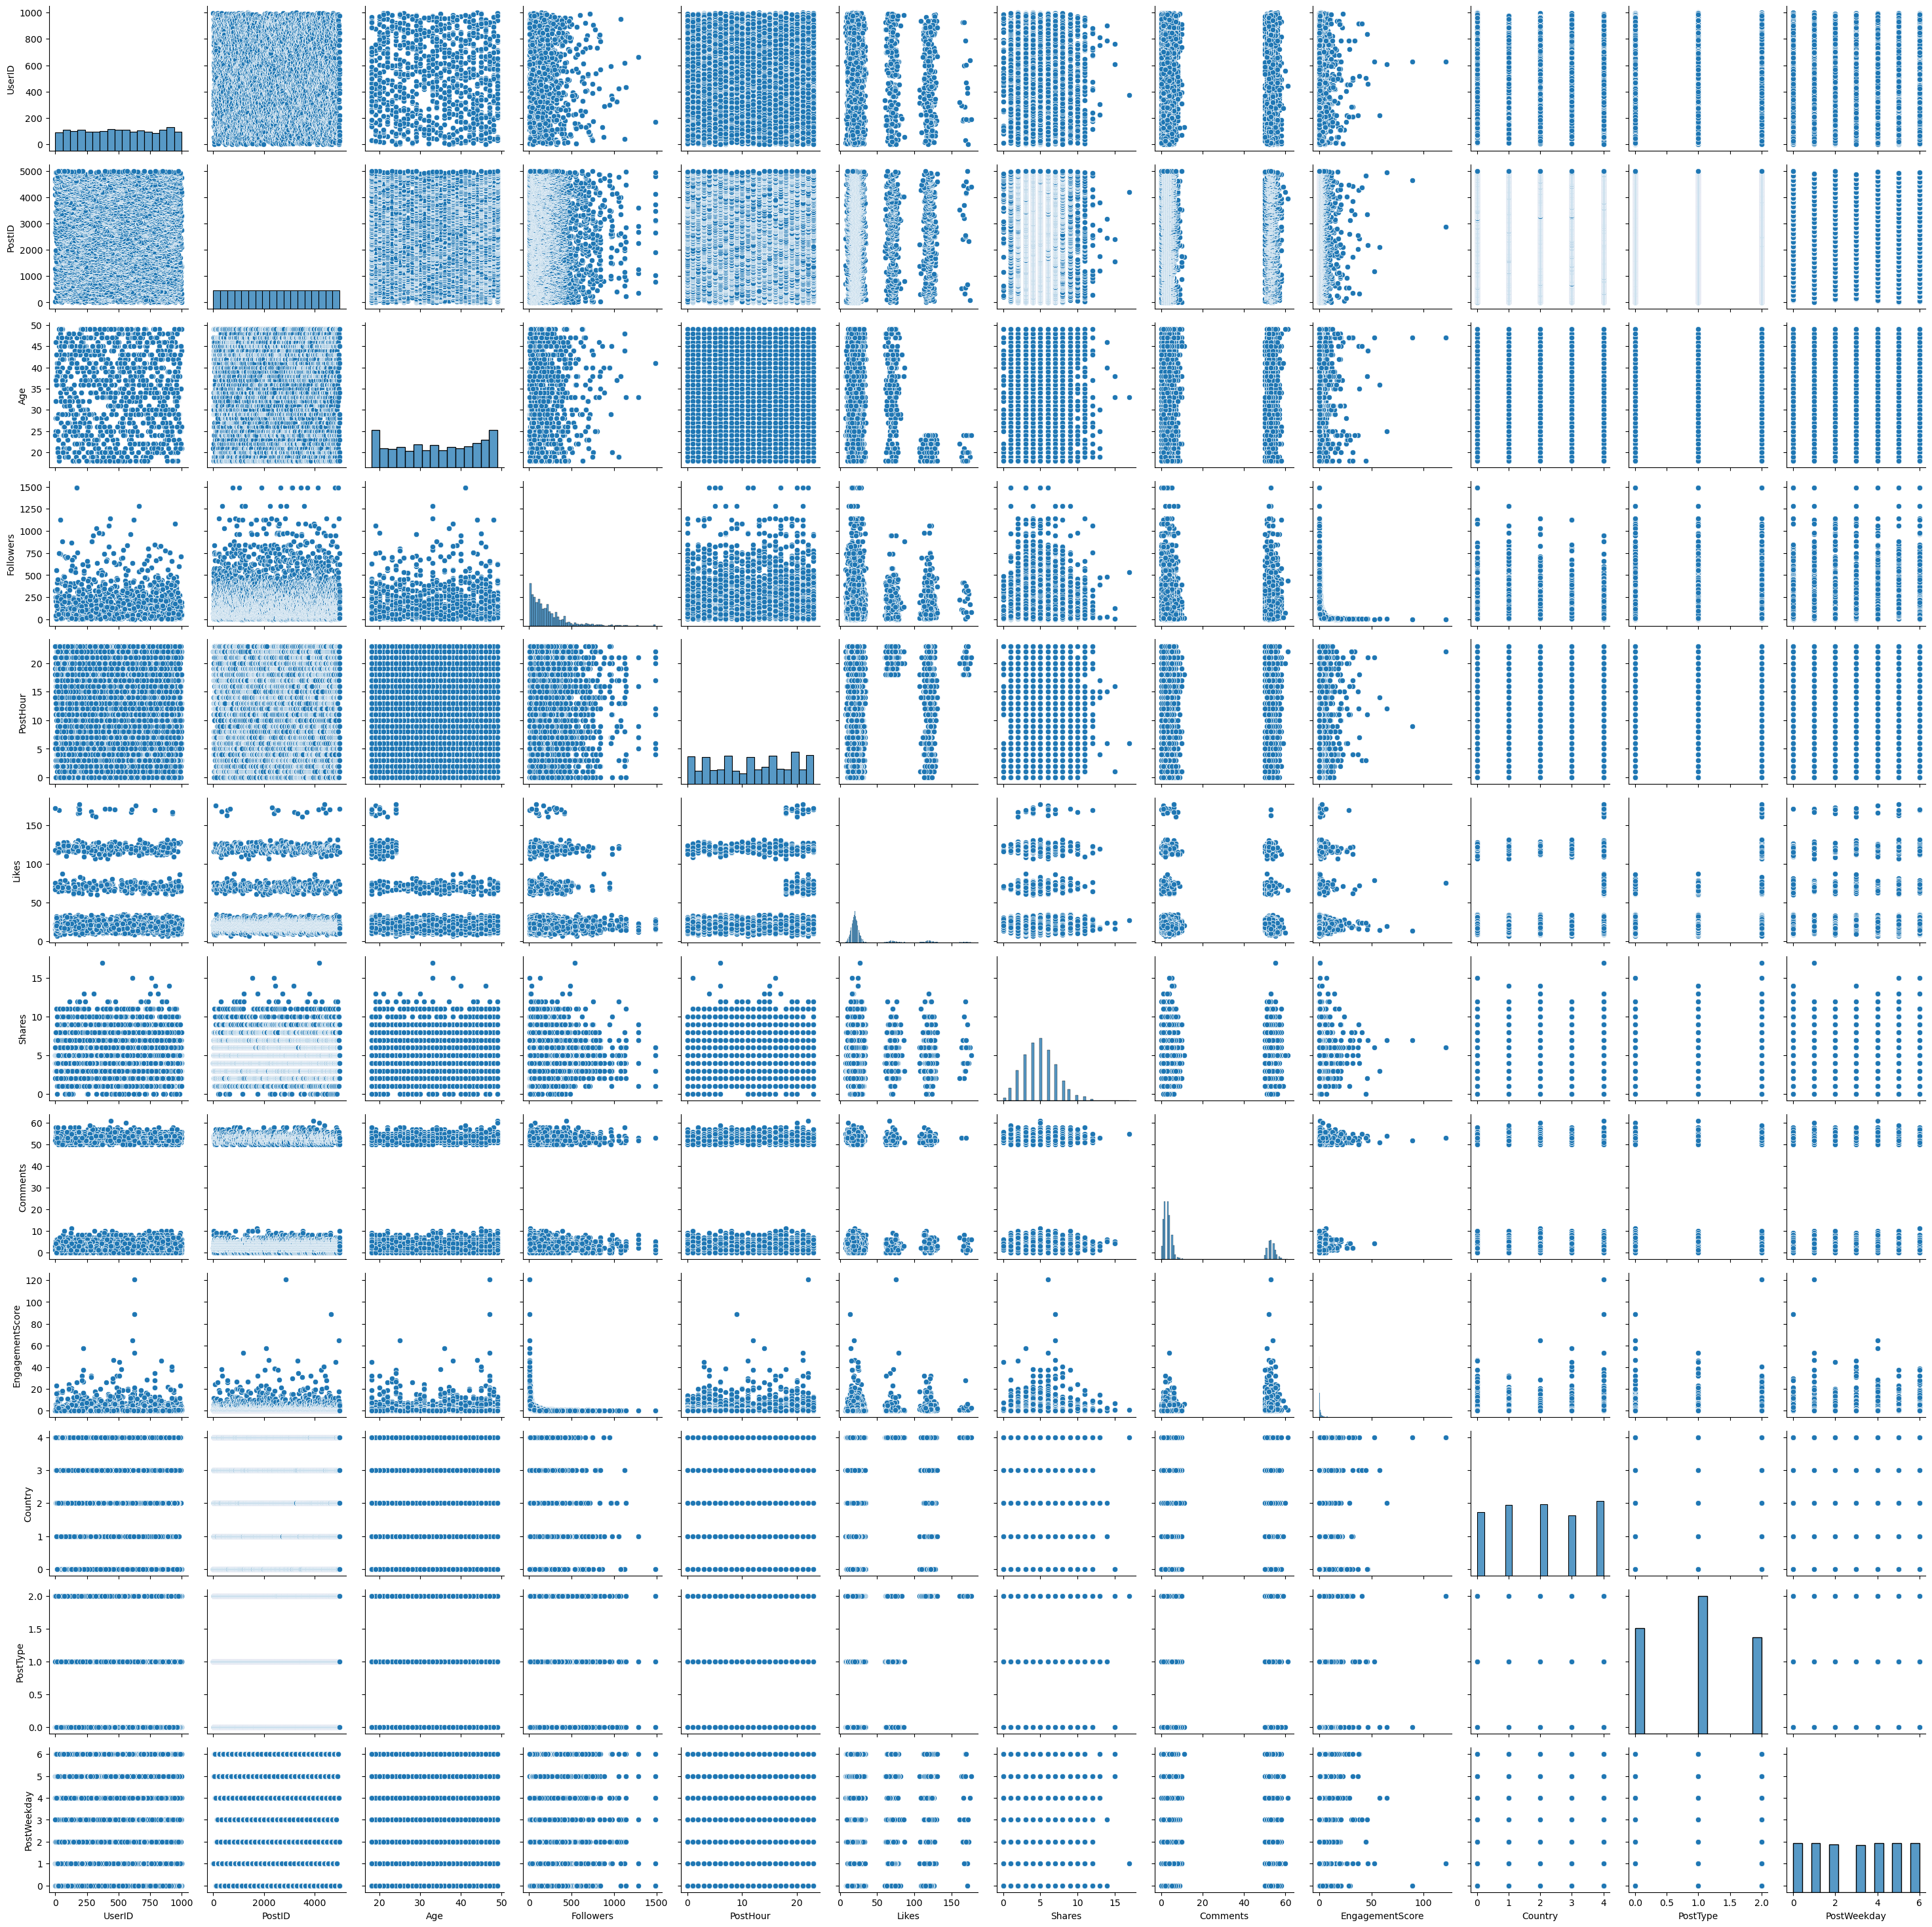

In [196]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.savefig("output.png")

In [203]:
import plotly.express as px 
df_corr=df.corr().round(1)

fig = px.imshow(df_corr, text_auto=True, height=800,color_continuous_scale='RdBu_r')
fig.show()

AttributeError: 'Figure' object has no attribute 'draw'

In [157]:
normalized_df=(df-df.mean())/df.std()


In [159]:
normalized_df['EngagementScore']=df['EngagementScore']

In [160]:
normalized_df

,UserID,PostID,Age,Followers,PostHour,Likes,Shares,Comments,EngagementScore,Country,PostType,PostWeekday
0,1.710256,-1.731531,-1.356656,-0.680747,1.475747,-0.293543,-0.429955,-0.614032,0.447761,-1.439726,0.033463,-0.997915
1,-1.579963,-1.730839,1.352905,0.989356,0.899170,-0.330339,0.015410,-0.521663,0.105651,-1.439726,1.330466,-0.997915
2,-0.702802,-1.730146,-1.669298,-0.155156,0.755026,-0.403931,1.351502,-0.521663,0.252874,1.386591,0.033463,-0.997915
3,1.304612,-1.729453,-1.252443,-0.749516,-0.830558,3.202067,0.906138,-0.244556,3.056604,0.680012,1.330466,-0.997915
4,-1.091111,-1.728760,-0.314518,-0.995119,-0.542270,-0.183155,0.015410,-0.660216,11.666667,-0.733147,0.033463,-0.997915
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.215962,1.728760,-1.565084,0.468677,0.610882,-0.440726,0.015410,-0.614032,0.099668,-1.439726,0.033463,-0.499755
4996,0.690947,1.729453,0.727621,-0.931262,1.187459,1.288680,0.015410,-0.660216,4.687500,1.386591,1.330466,-0.499755
4997,-0.990567,1.730146,1.561333,2.055275,0.034306,-0.330339,-0.875319,-0.660216,0.038462,0.680012,0.033463,-0.499755
4998,-1.108446,1.730839,-1.669298,0.566918,0.322594,-0.403931,0.015410,-0.567847,0.121495,-0.026567,-1.263541,-0.499755


In [165]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df.drop(['EngagementScore'],axis=1), df['EngagementScore'], test_size=0.3, random_state=1)

def score(model, X_train, X_test, y_train, _test):
    print("R2 train: ", round(r2_score(y_train, model.predict(X_train)), 4))
    print("R2 test: ", round(r2_score(y_test, model.predict(X_test)), 4))
    print("\nMSE train:", round(mean_squared_error (y_train, model.predict(X_train)), 4))
    print("MSE test: ", round(mean_squared_error(y_test, model.predict(X_test)), 4))
    print("\nMAE train: ", round(mean_absolute_error(y_train, model.predict(X_train)), 4))
    print("MAE test: ", round(mean_absolute_error(y_test, model.predict (X_test)), 4))

In [166]:
X_train

,UserID,PostID,Age,Followers,PostHour,Likes,Shares,Comments,Country,PostType,PostWeekday
1334,1.200601,-0.807401,1.457119,-0.376199,0.466738,-0.514318,-0.429955,-0.614032,1.386591,0.033463,-0.001594
4768,-0.879621,1.571506,1.352905,2.232109,0.034306,-0.146359,0.906138,-0.567847,1.386591,1.330466,1.492887
65,0.053012,-1.686502,0.102338,-0.980383,0.178450,-0.514318,-1.320683,-0.614032,1.386591,-1.263541,1.492887
177,-0.501714,-1.608914,-0.627159,-0.562857,-0.253982,-0.403931,-0.429955,-0.521663,-1.439726,1.330466,-0.997915
4489,-1.704776,1.378228,-0.627159,0.227986,0.178450,-0.219951,-0.875319,1.741376,-0.733147,-1.263541,-0.499755
...,...,...,...,...,...,...,...,...,...,...,...
2895,-1.361540,0.273983,-0.210304,-0.371286,-0.686414,-0.587910,0.906138,1.602823,-0.733147,1.330466,0.994727
2763,-1.337270,0.182540,-0.939801,-0.695483,0.466738,-0.661502,0.015410,-0.567847,1.386591,0.033463,0.496566
905,0.188226,-1.104592,-0.106090,0.940235,-0.974702,-0.293543,1.351502,-0.567847,-0.026567,0.033463,1.492887
3980,-0.896957,1.025618,1.352905,-0.273045,0.899170,-0.219951,-0.875319,-0.706401,-0.733147,0.033463,-1.496076


In [167]:
print('----------\nLinear')
model = LinearRegression()
model.fit(X_train, y_train)
score(model, X_train, X_test, y_train, y_test)

print('----------\nRidge')
model = Ridge()
model.fit(X_train, y_train)
score(model, X_train, X_test, y_train, y_test)

print('----------\nElasticNet')
model = ElasticNet()
model.fit(X_train, y_train)
score(model, X_train, X_test, y_train, y_test)

print('----------\nLasso')
model = Lasso()
model.fit(X_train, y_train)
score(model, X_train, X_test, y_train, y_test)

----------
Linear
R2 train:  0.1682
R2 test:  0.1256

MSE train: 14.4976
MSE test:  17.1762

MAE train:  1.6493
MAE test:  1.5843
----------
Ridge
R2 train:  0.1682
R2 test:  0.1256

MSE train: 14.4976
MSE test:  17.176

MAE train:  1.6492
MAE test:  1.5841
----------
ElasticNet
R2 train:  0.0906
R2 test:  0.0751

MSE train: 15.8501
MSE test:  18.1694

MAE train:  1.6065
MAE test:  1.5046
----------
Lasso
R2 train:  0.0333
R2 test:  0.0275

MSE train: 16.8496
MSE test:  19.104

MAE train:  1.7242
MAE test:  1.6173


In [168]:
model.coef_

array([-0.        ,  0.        ,  0.        , -0.17813977,  0.        ,
        0.        ,  0.        ,  0.09216348,  0.        ,  0.        ,
       -0.        ])

In [169]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df.drop(['EngagementScore','UserID','PostID',
                                                             'Shares',
                                                             'Age','PostHour','Country','PostType','PostWeekday'],axis=1), df['EngagementScore'], test_size=0.3, random_state=1)

def score(model, X_train, X_test, y_train, _test):
    print("R2 train: ", round(r2_score(y_train, model.predict(X_train)), 4))
    print("R2 test: ", round(r2_score(y_test, model.predict(X_test)), 4))
    print("\nMSE train:", round(mean_squared_error (y_train, model.predict(X_train)), 4))
    print("MSE test: ", round(mean_squared_error(y_test, model.predict(X_test)), 4))
    print("\nMAE train: ", round(mean_absolute_error(y_train, model.predict(X_train)), 4))
    print("MAE test: ", round(mean_absolute_error(y_test, model.predict (X_test)), 4))

In [170]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=3)

model.fit(X_train, y_train)
score(model, X_train, X_test, y_train, y_test)

R2 train:  0.9044
R2 test:  0.8096

MSE train: 1.6666
MSE test:  3.7407

MAE train:  0.5407
MAE test:  0.5469


In [171]:
model.feature_importances_

array([0.63874529, 0.05601863, 0.30523608])

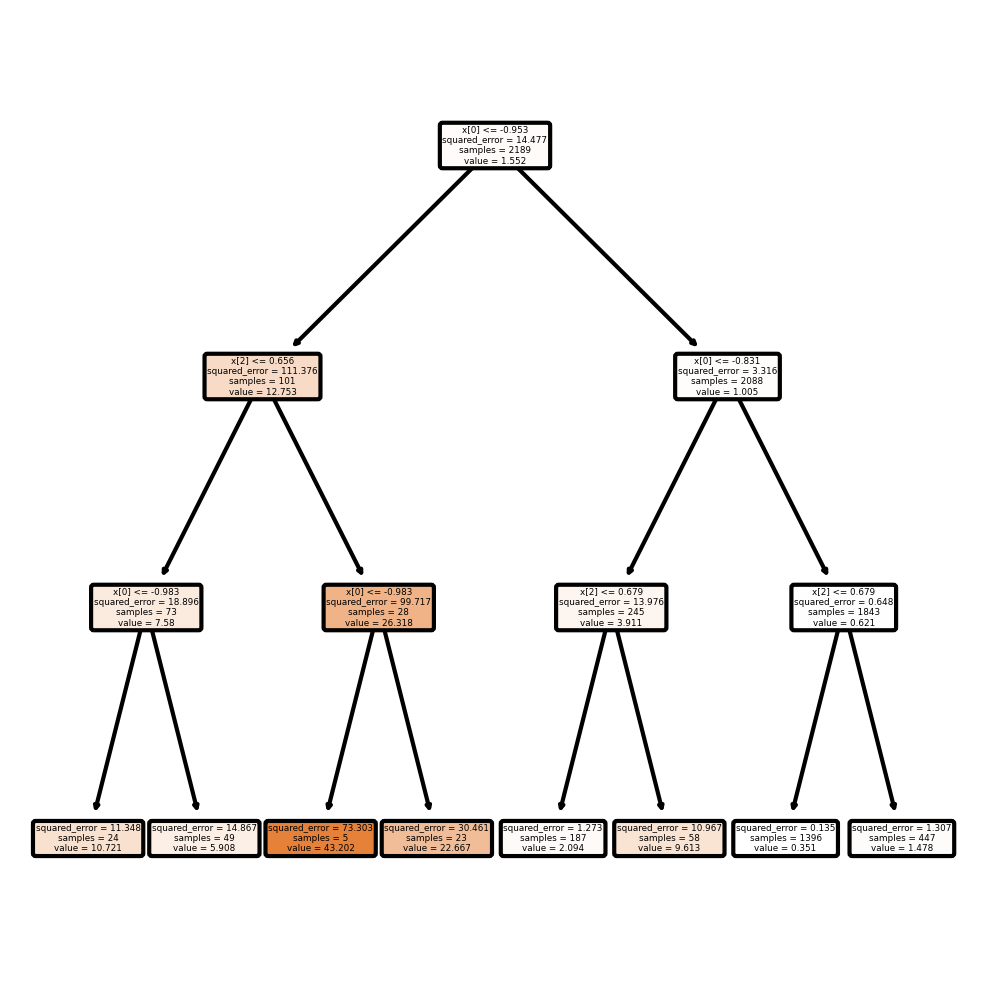

In [194]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model.estimators_[0],filled=True,rounded=True, ax=axes)
plt.savefig('tree.png')